In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc

In [2]:
rc('font', family='Malgun Gothic') # Windows OS 
# rc('font', family='AppleGothic') # os x(mac os)  

%matplotlib inline
plt.style.use("ggplot") # 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
mpl.rcParams["axes.unicode_minus"] = False # 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해

<br>

## 1. Brief check on data

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 직접 채워줘야 하는 데이터들
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
!pip install missingno==0.5.1

import missingno as msno

<AxesSubplot:>

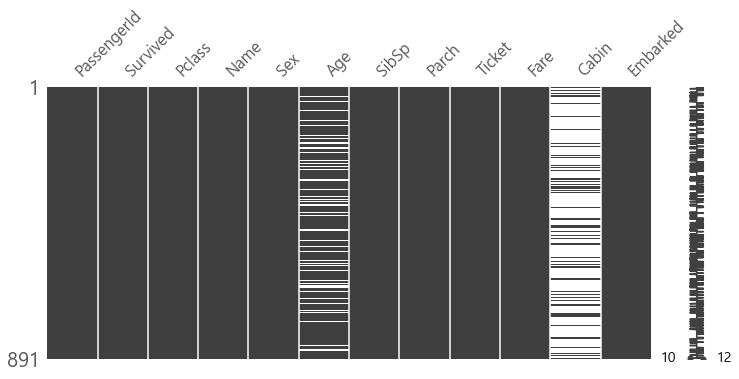

In [8]:
msno.matrix(titanic_df, figsize=(12,5))

In [9]:
# discrete 데이터들을 survive, dead 로 시각화.

def bar_chart(feature, ax=None): # feature <- 열 이름, ax <- subplot 객체 
    survived = titanic_df[titanic_df['Survived']==1][feature].value_counts()
    dead = titanic_df[titanic_df['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    df.plot(kind='bar', stacked=True, ax=ax)

[Text(0.5, 1.0, '승선 장소')]

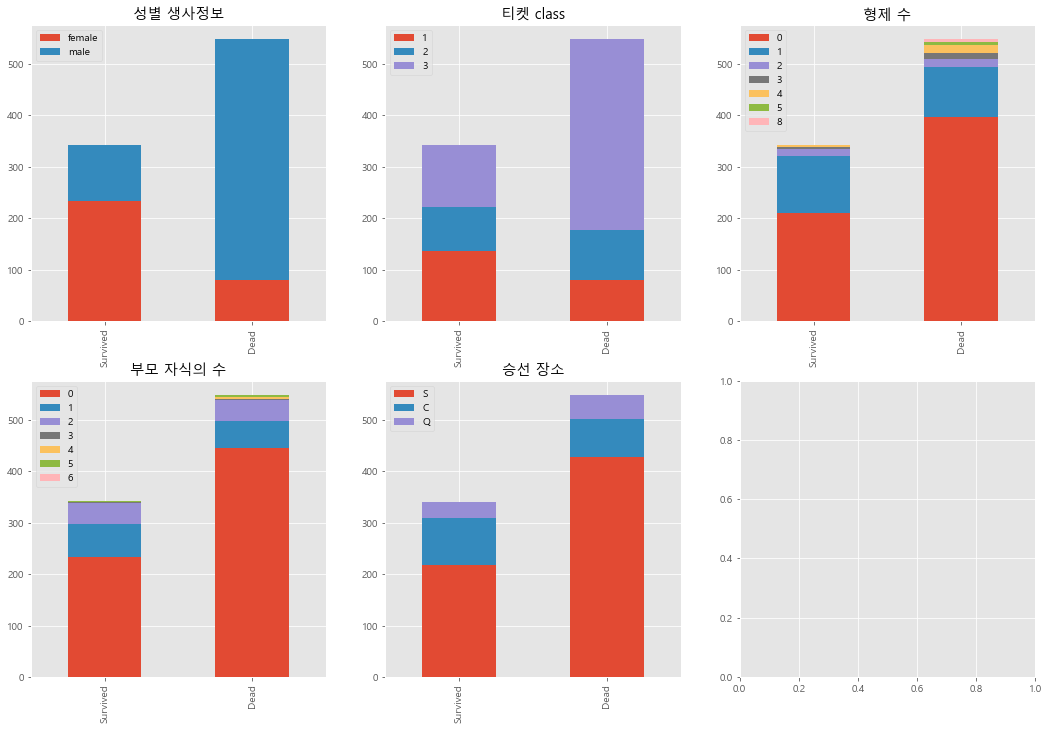

In [10]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

#### 1. 성별
-> 상대적으로 남성의 unsurvived 비율이 높음
<br>
<br>

#### 2. 티켓 class 별
-> 티켓 가격이 높을수록 survived 비율이 높음
<br>
<br>

#### 3 & 4. 형제 , 부모/자식
-> 함께 승선한 형제 혹은 부모/자식이 아예 없는 탑승자의 상대적인 unsurvived 비율이 높음
<br>
<br>

#### 5. 승선장소
-> C 승선장 (Cherbourg)에서 승선한 탑승자의 상대적인 survived 비율이 높음

<br>

## 2. 데이터 시각화를 통한 데이터 탐색

In [11]:
# continous 데이터 분석

def draw_facetgrid(feature):
    facet = sns.FacetGrid(titanic_df, hue="Survived", aspect=5) # Multi-plot grid for plotting conditional relationships.
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, titanic_df[feature].max()))
    
    facet.add_legend() 
    plt.show()

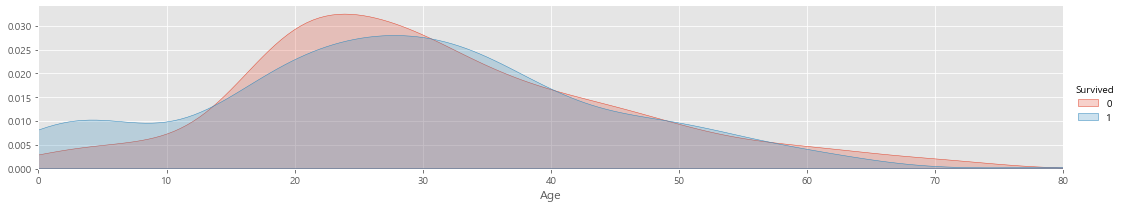

In [12]:
draw_facetgrid("Age")

#### -> 10세 이하의 경우 Survived 비율이 크고, 10대 중반에서 30세까지는 Unsurvived의 비율이 더 큼. (나머지 데이터는 큰 의미 X)

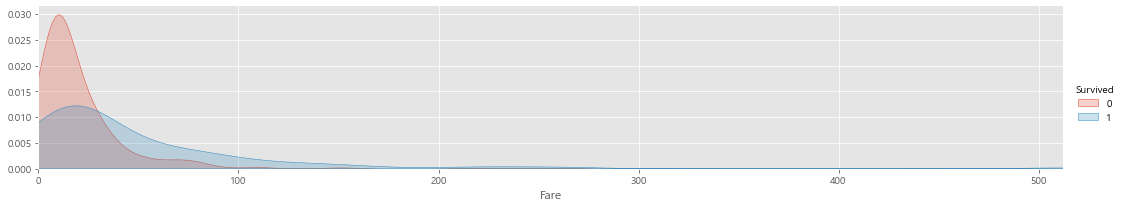

In [13]:
draw_facetgrid("Fare")

#### -> 비싸게 표를 산 사람들이 survived 비율이 더 높음.

In [14]:
# visualize name column
titanic_df['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [15]:
# 알파벳 대소문자가 1개 이상 나오고 바로 "."이 붙은 단어들을 골라내어 Title 열에 담는다.
titanic_df["Title"] = titanic_df["Name"].str.extract('([A-Za-z]+)\.', expand=False) 
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Sir           1
Ms            1
Mme           1
Jonkheer      1
Countess      1
Don           1
Lady          1
Name: Title, dtype: int64

<AxesSubplot:>

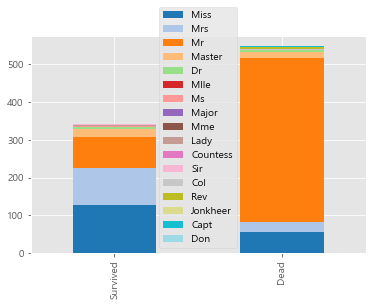

In [16]:
# bar_chart("Title") # colormap should be changed

survived = titanic_df[titanic_df['Survived']==1]["Title"].value_counts()
dead = titanic_df[titanic_df['Survived']==0]["Title"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']

df.plot(kind='bar', stacked=True, colormap='tab20')

#### -> Miss/Mrs 가 Mr 보다 상대적인 survived 비율이 더 높음.

In [17]:
# Visualize Cabin column

titanic_df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F33            3
              ..
A16            1
D11            1
A26            1
C50            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [18]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

<AxesSubplot:>

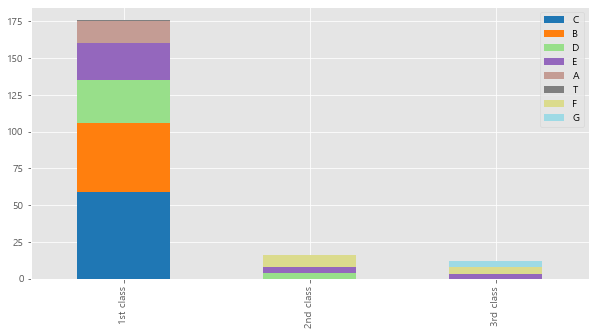

In [19]:
# Pclass 별로 cabin 확인해보기

Pclass1 = titanic_df[titanic_df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = titanic_df[titanic_df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = titanic_df[titanic_df['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']

df.plot(kind='bar',stacked=True, figsize=(10,5), colormap='tab20')

#### -> 더 비싼 운임의 탑승자는 A/B/C/D Cabin에 거의 대부분 포함되어 있음